In [2]:
# import the packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn import preprocessing
from sklearn import tree      # for decision trees
from sklearn import ensemble  # for random forests
from sklearn.metrics import accuracy_score

from bokeh.io import show, output_file
from bokeh.plotting import figure
from bokeh.models import (CategoricalColorMapper, HoverTool, 
						  ColumnDataSource, Panel, 
						  FuncTickFormatter, SingleIntervalTicker, LinearAxis,FactorRange)
from bokeh.models.widgets import (CheckboxGroup, Slider, RangeSlider, 
								  Tabs, CheckboxButtonGroup, 
								  TableColumn, DataTable, Select)
from bokeh.layouts import column, row, WidgetBox
from bokeh.palettes import Category20_16,Spectral6
from bokeh.transform import factor_cmap

try: # different imports for different versions of scikit-learn
    from sklearn.model_selection import cross_val_score   # simpler cv this week
except ImportError:
    try:
        from sklearn.cross_validation import cross_val_score
    except:
        print("No cross_val_score!")



In [3]:
df = pd.read_csv('bokeh_app/data/African_Studies_Journal_Review_Project_Database.csv', header=0,encoding = 'unicode_escape') 

In [4]:
cleaned_df = df.iloc[:,[0]+list(range(19,140))]

In [5]:
cleaned_df = cleaned_df.dropna()
cleaned_df.head()

,Observations,Author 1 Country,Author 2 Country,Author 3 Country,Author 4 Country,Author 5 Country,Author 6 Country,Journal,Journal Type,Country 1,...,topics: resource curse,topics: youth,topics: music,topics: other,methods: qualitative,methods: quantitative,methods: single case study,methods: multiple case studies,methods: formal model,methods: statistical methods
0,"""ZANU(PF) strategies in general elections, 198...",USA,0,0,0,0,0,AA,africanist,Zimbabwe,...,0.0,0.0,0.0,0,1.0,0.0,1.0,0.0,0.0,0.0
1,"""Rewriting the African diaspora: Beyond the Bl...",USA,0,0,0,0,0,AA,africanist,continental,...,0.0,0.0,0.0,0,1.0,0.0,0.0,1.0,0.0,0.0
2,"""Shifting geographies of social inclusion and ...",UK,0,0,0,0,0,AA,africanist,South Africa,...,0.0,0.0,0.0,0,1.0,0.0,1.0,0.0,0.0,0.0
3,"""Japan and the development of Africa: A prelim...",Scotland,0,0,0,0,0,AA,africanist,continental,...,0.0,0.0,0.0,0,1.0,0.0,1.0,0.0,0.0,0.0
4,"""Briefing: Darfur, Sudan: Prospects for peace""",USA,0,0,0,0,0,AA,africanist,Sudan,...,0.0,0.0,0.0,0,1.0,0.0,1.0,0.0,0.0,0.0


In [12]:
cleaned_df['Country 1'].value_counts()#.plot(kind='bar',figsize=(30, 20))

continental                 101
South Africa                 56
Nigeria                      50
Kenya                        49
Ghana                        34
Rwanda                       34
Tanzania                     31
DRC                          27
Ethiopia                     26
Sudan                        23
Sierra Leone                 21
Uganda                       18
Cameroon                     14
Liberia                      13
Cte d'Ivoire               13
Zimbabwe                     12
Malawi                       11
Botswana                      9
Senegal                       9
Zambia                        9
Mozambique                    8
Somalia                       8
Benin                         7
Eritrea                       6
Mali                          6
Niger                         6
Burundi                       6
Guinea Bissau                 6
Central African Republic      5
Angola                        5
Chad                          4
Guinea  

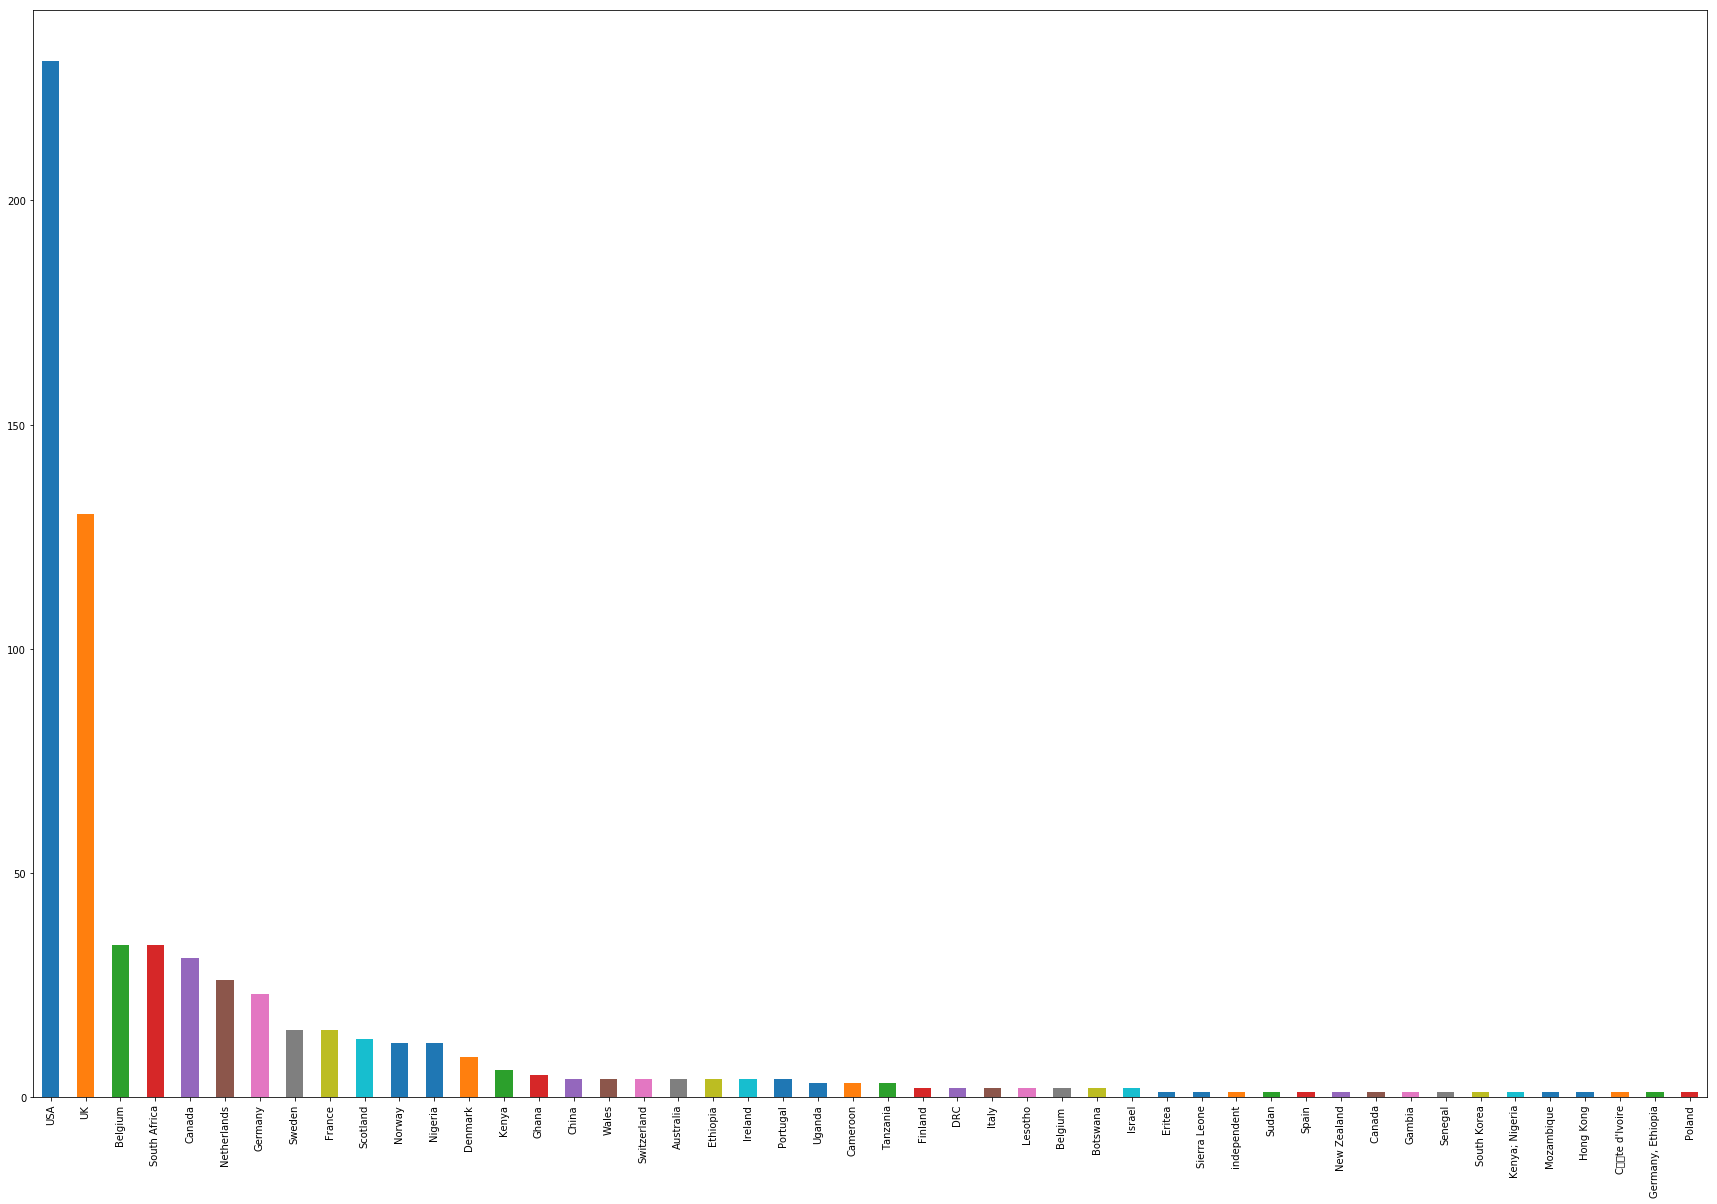

In [7]:
cleaned_df['Author 1 Country'].value_counts().plot(kind='bar',figsize=(30, 20))

In [19]:
cleaned_df.iloc[:,range(21,115)] = cleaned_df.iloc[:,range(21,115)].astype(int)
subset = cleaned_df.iloc[:,[0,9]+list(range(21,115))]
#print(subset.head())


table=subset.groupby('Country 1').sum()
table

,topics_domestic_politics,topics_international_relations,topics_society,topics_econ,topics: political systems,topics: constitutional issues,topics: justice/ judiciary,topics: legislatures,topics: policy,topics: governance,...,topics: Islam,topics: witchcraft/traditional religions,topics: Christianity,topics: HIV/AIDS,topics: immigration,topics: emigration,topics: refugees/IDP,topics: resource curse,topics: youth,topics: music
Country 1,,,,,,,,,,,,,,,,,,,,,
Algeria,2,1,0,0,1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
Angola,3,1,4,2,3,0,0,0,0,3,...,0,0,0,0,1,0,0,0,1,1
Benin,5,4,4,3,3,1,0,0,0,2,...,0,0,1,0,0,0,0,0,1,0
Botswana,8,1,5,4,7,2,1,1,4,7,...,0,0,0,1,0,0,0,0,0,0
Burkina Faso,2,0,3,1,2,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,1
Burundi,6,2,3,0,5,3,1,2,1,5,...,0,0,0,0,0,0,0,0,1,0
Cameroon,10,3,13,6,6,0,1,0,4,8,...,0,2,0,0,5,1,0,0,2,0
Cape Verde,1,0,1,0,1,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
Central African Republic,4,3,4,0,1,0,1,0,0,4,...,0,1,0,0,0,0,1,0,0,0


In [12]:
import colorcet as cc
sum_table=subset.groupby('Journal').sum()
sum_table['Journal']=['AA','ASR','JMAS']
#print(sum_table)

topic_list = ["topics_domestic_politics","topics_international_relations"]
table = sum_table[topic_list]
new_table = pd.melt(table,var_name='topics',value_name = 'count')
journal = ["AA","ASR","JMAS"]*2
new_table['Journal'] = journal
#print(new_table)
#new_table.loc[new_table['Journal'].isin(['AA','ASR'])]
grouped = new_table.groupby(['topics','Journal'])
x = [name for name,group in grouped]
counts = new_table.groupby(['topics','Journal'])['count'].sum().values

source = ColumnDataSource(data=dict(x=x, counts=counts))

p = figure(x_range=FactorRange(*x), plot_height=250, title="Fruit Counts by Year",
           toolbar_location=None, tools="")
palette = [cc.rainbow[i*15] for i in range(17)]
p.vbar(x='x', top='counts', width=0.9, source=source,fill_color=factor_cmap('x', palette=palette, factors=journal, start=1, end=2))

p.y_range.start = 0
p.x_range.range_padding = 0.1
p.xaxis.major_label_orientation = 1
p.xgrid.grid_line_color = None
hover = HoverTool()
hover.tooltips = [("count","@counts")]

hover.mode = 'vline'

p.add_tools(hover)
show(p)

In [10]:
sum_table.ix[2].plot(kind='bar',figsize=(30, 20))

/Users/alexa712/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


TypeError: Empty 'DataFrame': no numeric data to plot

In [81]:
print(sum_table[2:3])
np.histogram(sum_table[2:3])
#table['Journal']=="AA"
#sum_table['Journal']=="AA"

         topics: domestic politics  topics: international relations  \
Journal                                                               
JMAS                           144                               60   

         topics: society  topics: econ/poli econ  
Journal                                           
JMAS                 111                      84  


(array([1, 0, 1, 0, 0, 0, 1, 0, 0, 1]),
 array([ 60. ,  68.4,  76.8,  85.2,  93.6, 102. , 110.4, 118.8, 127.2,
        135.6, 144. ]))

In [4]:
len(df.columns)

148